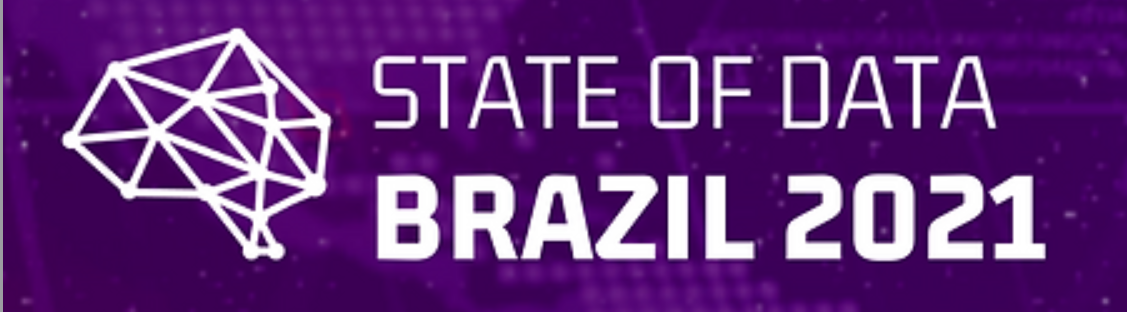

In [2]:
from IPython.display import Image
Image("logo.png")

A State of Data Brazil foi realizada entre 18 de outubro de 2021 e 6 de dezembro de 2021 através de um questionário online e reuniu indicadores relacionados a **perfil demográfico, formação, atuação no setor, remuneração, rotatividade e fatores de satisfação no ambiente de trabalho,** incluindo o impacto do trabalho remoto nas preferências profissionais de 2.645 respondentes de todo o Brasil. A amostra reflete a visão de variados papéis de atuação em empresas, como os de analista de dados, cientista de dados e engenheiro de dados, bem como diferentes perfis de experiência profissional, incluindo analistas júnior, pleno, sênior e gestores.

Há uma grande quantidade de colunas e elas são divididas em 10 categorias, de P0 a P9. Cada categoria é relacionada com um tipo de análise diferente.

- **P0: Id de cada usuário que respondeu ao questionário.**
- **P1: Perguntas pessoais e demográficas: Idade, Estado, Genero, ... df_1**
- **P2: Perguntas relacionadas ao emprego atual: Salario, Cargo, Nível, ... df_2**
- **P3: Perguntas mais específicas sobre o emprego atual: Nível da equipe, ... df_3**
- **P4: Perguntas sobre como é a analise de dados na empresa, que tipo de dado é utilizado. df_4**
- **P5: Perguntas sobre novas oportunidades (Apenas 3 perguntas) df_5**
- **P6: Perguntas sobre rotina de trabalho relacionada a Engenharia de Dados e ferramentas utilizadas df_6**
- **P7: Perguntas sobre rotina de trabalho relacionada a Análise de Dados e ferramentas utilizadas df_7**
- **P8: Perguntas sobre rotina de trabalho relacionada a Ciencia de Dados e ferramentas utilizadas df_8**
- **P9: Perguntas sobre interação com Data Hackers df_9**

*Vamos entender cada uma das categorias e obter informações relevantes sobre o estudo.*

# P1: Questões Pessoais e Demográficas

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('State of Data.csv')

df_1 = data.loc[:,"('P1_a ', 'Idade')":"('P1_i ', 'Área de Formação')"]
df_1.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_2 = data.loc[:,"('P2_a ', 'Qual sua situação atual de trabalho?')":"('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"]
df_2.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_3 = data.loc[:,"('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')":"('P3_d_n ', 'Dividir o tempo entre entregas técnicas e gestão.')"]
df_3.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_4 = data.loc[:,"('P4_a_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')":"('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho')"]
df_4.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_5 = data.loc[:,"('P5_b ', 'Qual oportunidade você está buscando?')":"('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"]
df_5.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_6 = data.loc[:,"('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')":"('P6_h_h ', 'Cuidando da qualidade dos dados, metadados e dicionário de dados.')"]
df_6.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_7 = data.loc[:,"('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')":"('P7_d_h ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')"]
df_7.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_8 = data.loc[:,"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')":"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"]
df_8.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_9 = data.loc[:,"('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')":"('P9_a_g ', 'Ainda não conhecia o Data Hackers')"]
df_9.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [10]:
# data = pd.read_csv('../input/statedata/State of Data.csv')
# !pip install geobr

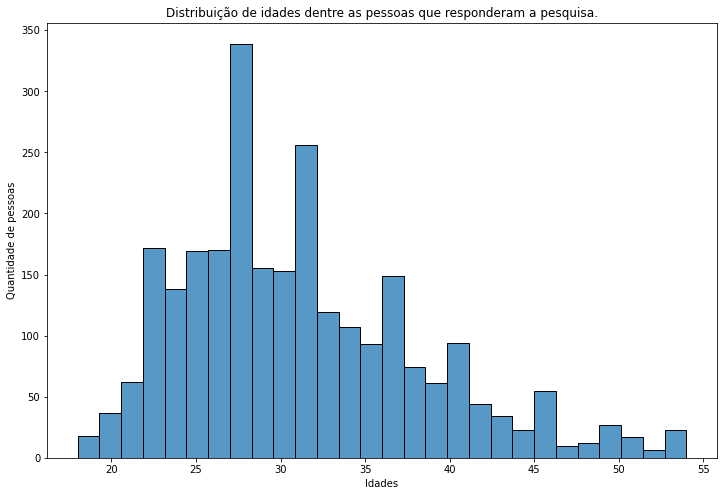

In [7]:
ax = sns.histplot(df_1["('P1_a ', 'Idade')"]);
ax.set_title('Distribuição de idades dentre as pessoas que responderam a pesquisa.')
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Idades');

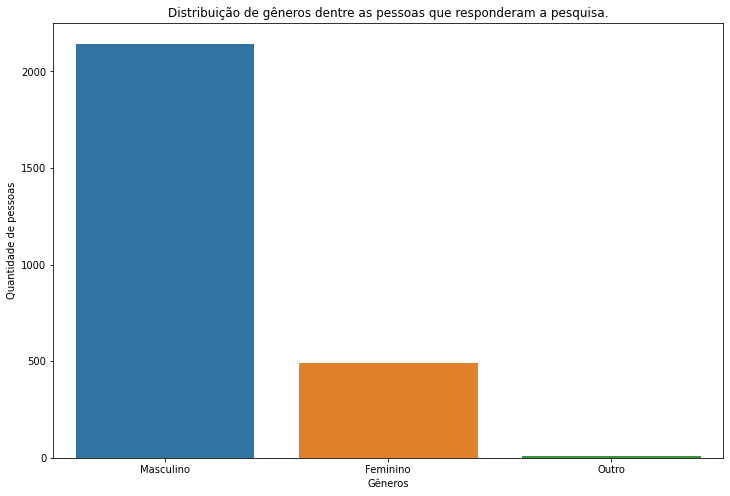

In [9]:
ax = sns.countplot(df_1["('P1_b ', 'Genero')"]);
ax.set_title('Distribuição de gêneros dentre as pessoas que responderam a pesquisa.')
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Gêneros');

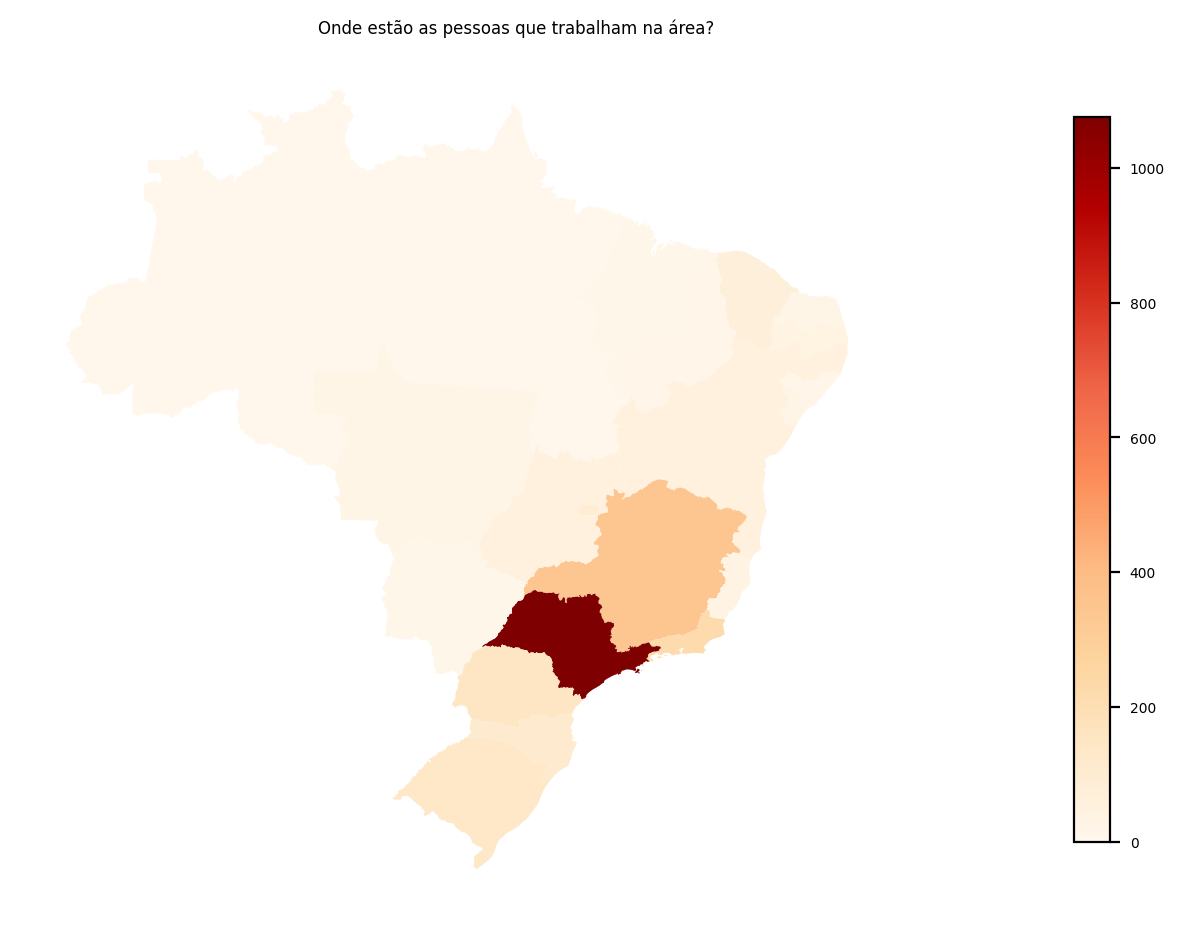

In [13]:
import geobr 

count_states = df_1.groupby(by=["('P1_e_a ', 'uf onde mora')"]).count().reset_index()
states = geobr.read_state(year=2019, simplified=True)
states = states.merge(count_states, how="left", left_on="abbrev_state", right_on="('P1_e_a ', 'uf onde mora')")
states["('P0', 'id')"] = states["('P0', 'id')"].fillna(0)

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

states.plot(
    column="('P0', 'id')",
     cmap='OrRd',
     legend=True,
     legend_kwds={
         "shrink": 0.6
     },
     ax=ax
)
ax.set_title("Onde estão as pessoas que trabalham na área?")
ax.axis("off");

Text(0.5, 0, 'Esatdos')

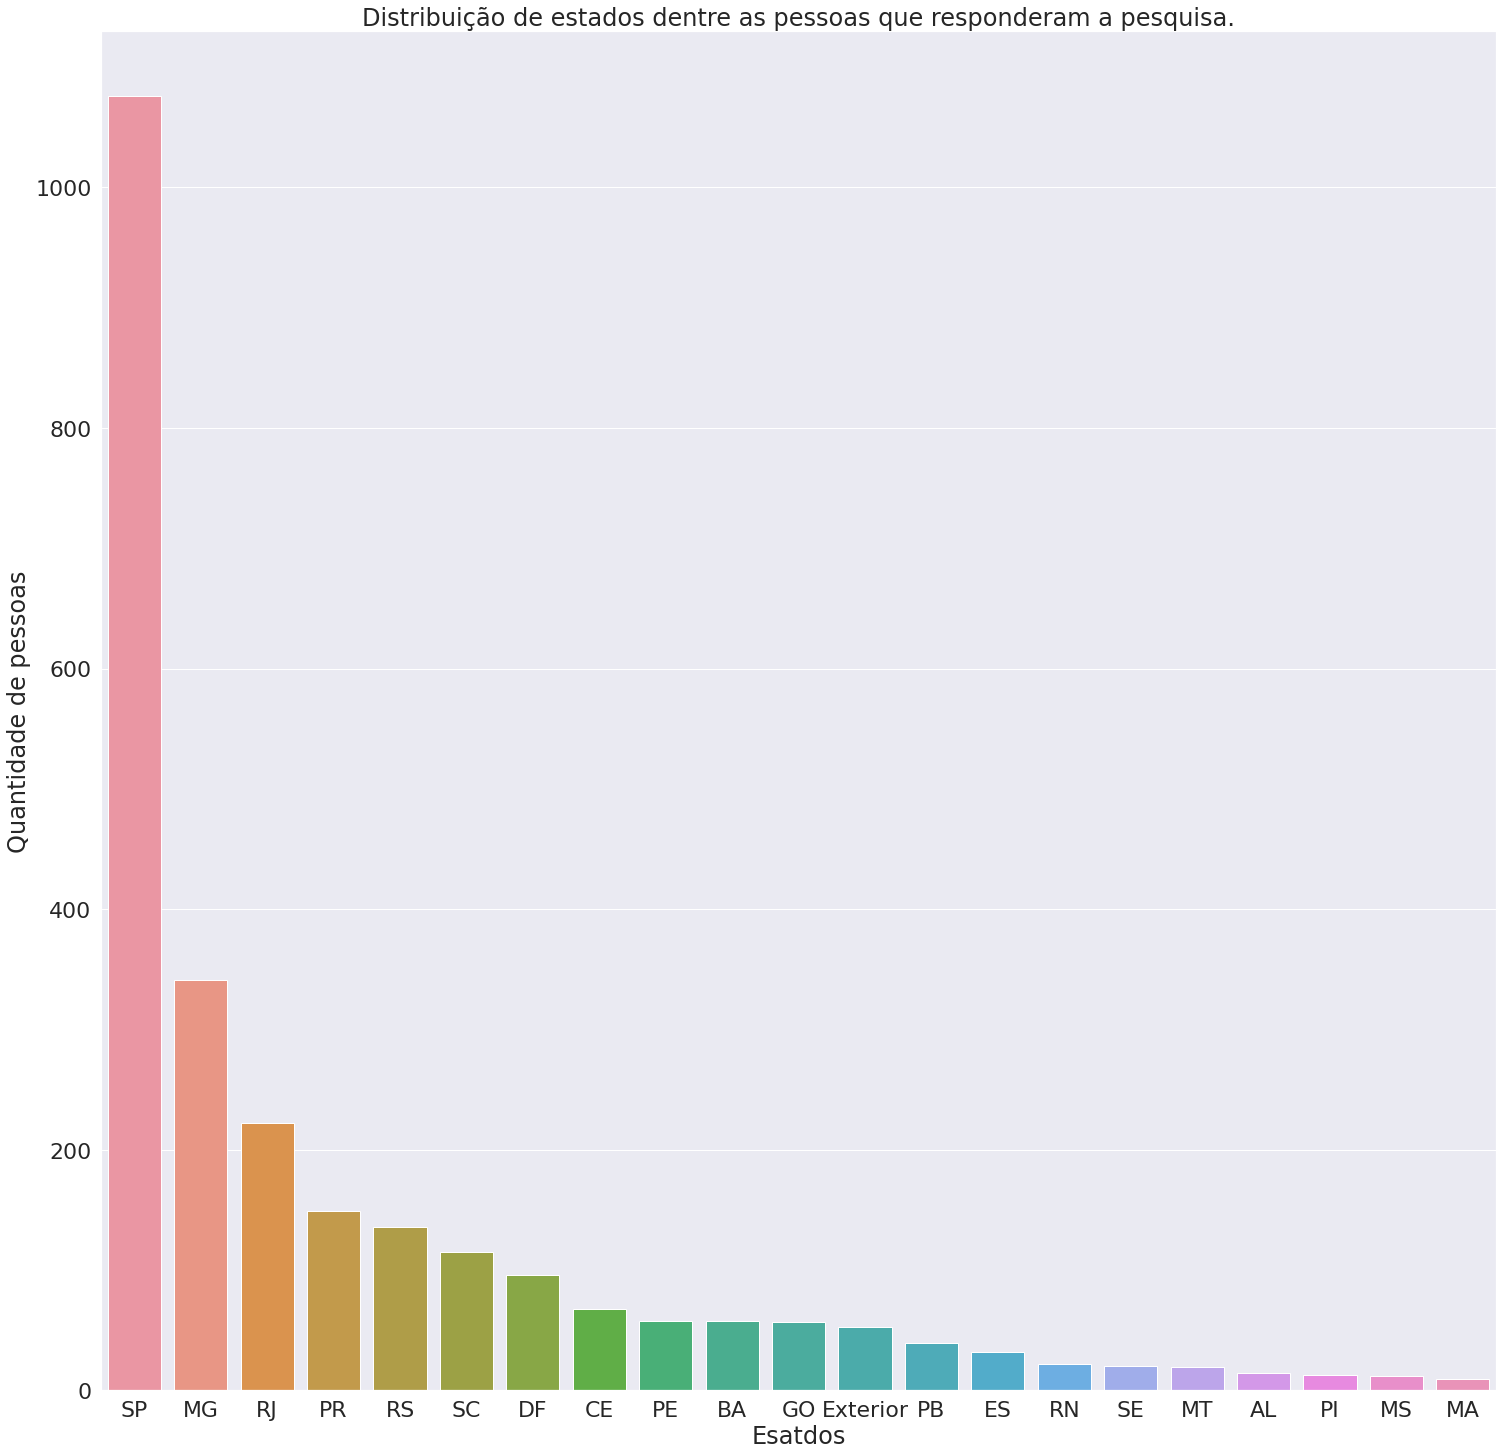

In [23]:
ax = sns.countplot(df_1["('P1_e_a ', 'uf onde mora')"], order = df_1["('P1_e_a ', 'uf onde mora')"].value_counts().index);
ax.set_title('Distribuição de estados dentre as pessoas que responderam a pesquisa.')
ax.figure.set_size_inches(25, 25)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Esatdos')

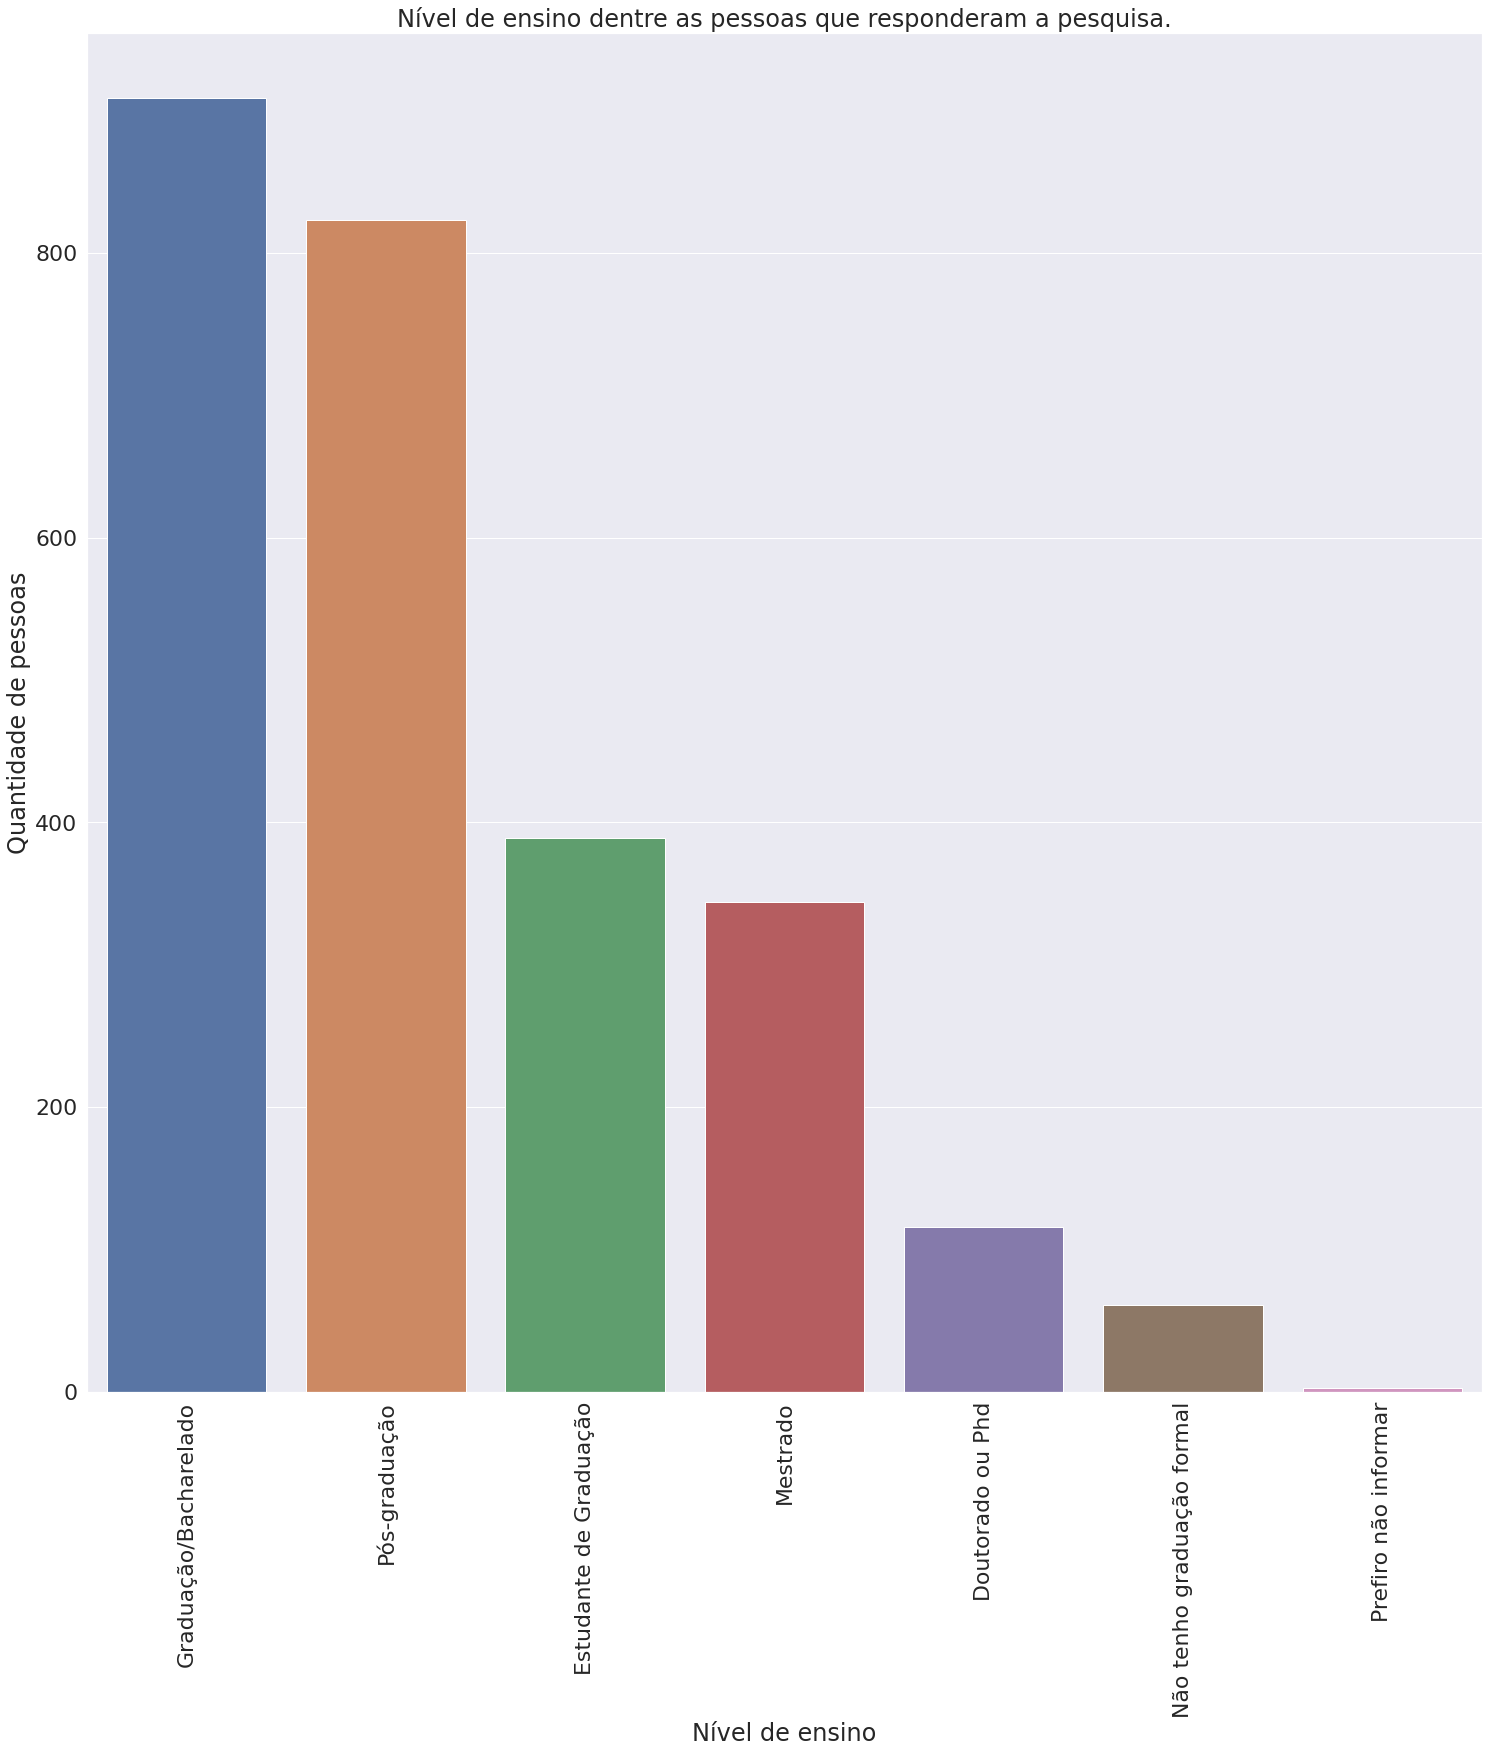

In [28]:
ax = sns.countplot(df_1["('P1_h ', 'Nivel de Ensino')"], order = df_1["('P1_h ', 'Nivel de Ensino')"].value_counts().index);
ax.set_title('Nível de ensino dentre as pessoas que responderam a pesquisa.')
ax.figure.set_size_inches(25, 25)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Nível de ensino')
ax.tick_params(axis='x', rotation=90)

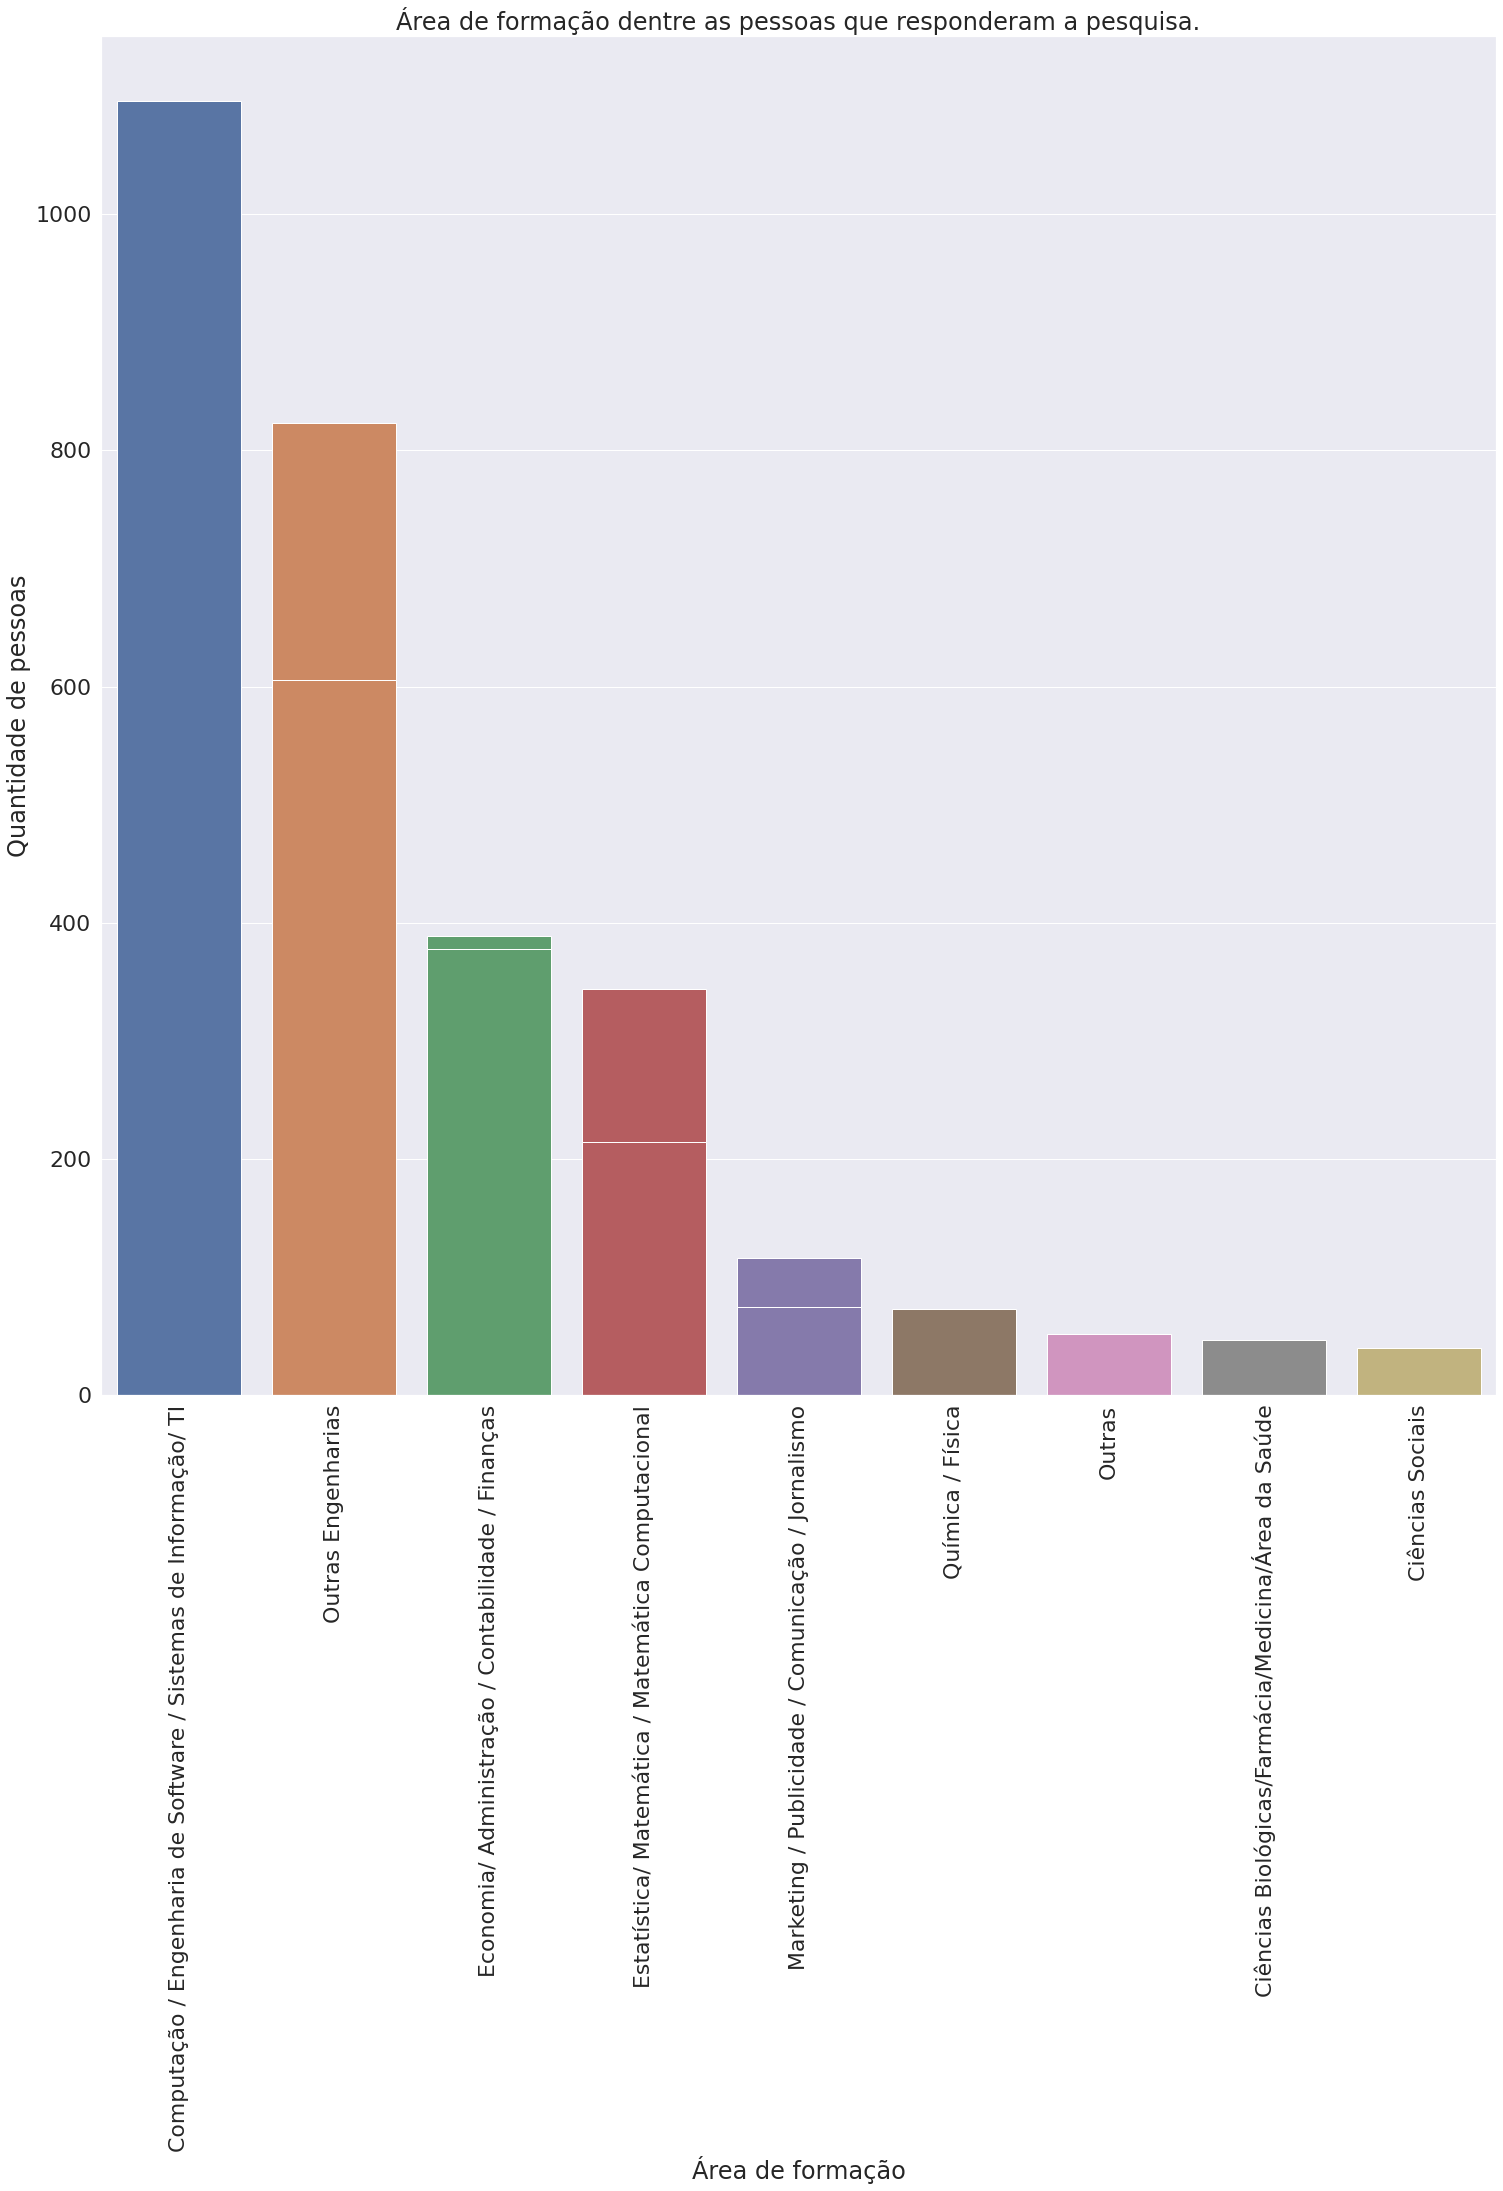

In [27]:
ax = sns.countplot(df_1["('P1_h ', 'Nivel de Ensino')"], order = df_1["('P1_h ', 'Nivel de Ensino')"].value_counts().index);
ax.set_title('Nível de ensino dentre as pessoas que responderam a pesquisa.')
ax = sns.countplot(df_1["('P1_i ', 'Área de Formação')"], order = df_1["('P1_i ', 'Área de Formação')"].value_counts().index);
ax.set_title('Área de formação dentre as pessoas que responderam a pesquisa.')
ax.figure.set_size_inches(25, 25)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Área de formação')
sns.set(font_scale = 2)
ax.tick_params(axis='x', rotation=90)

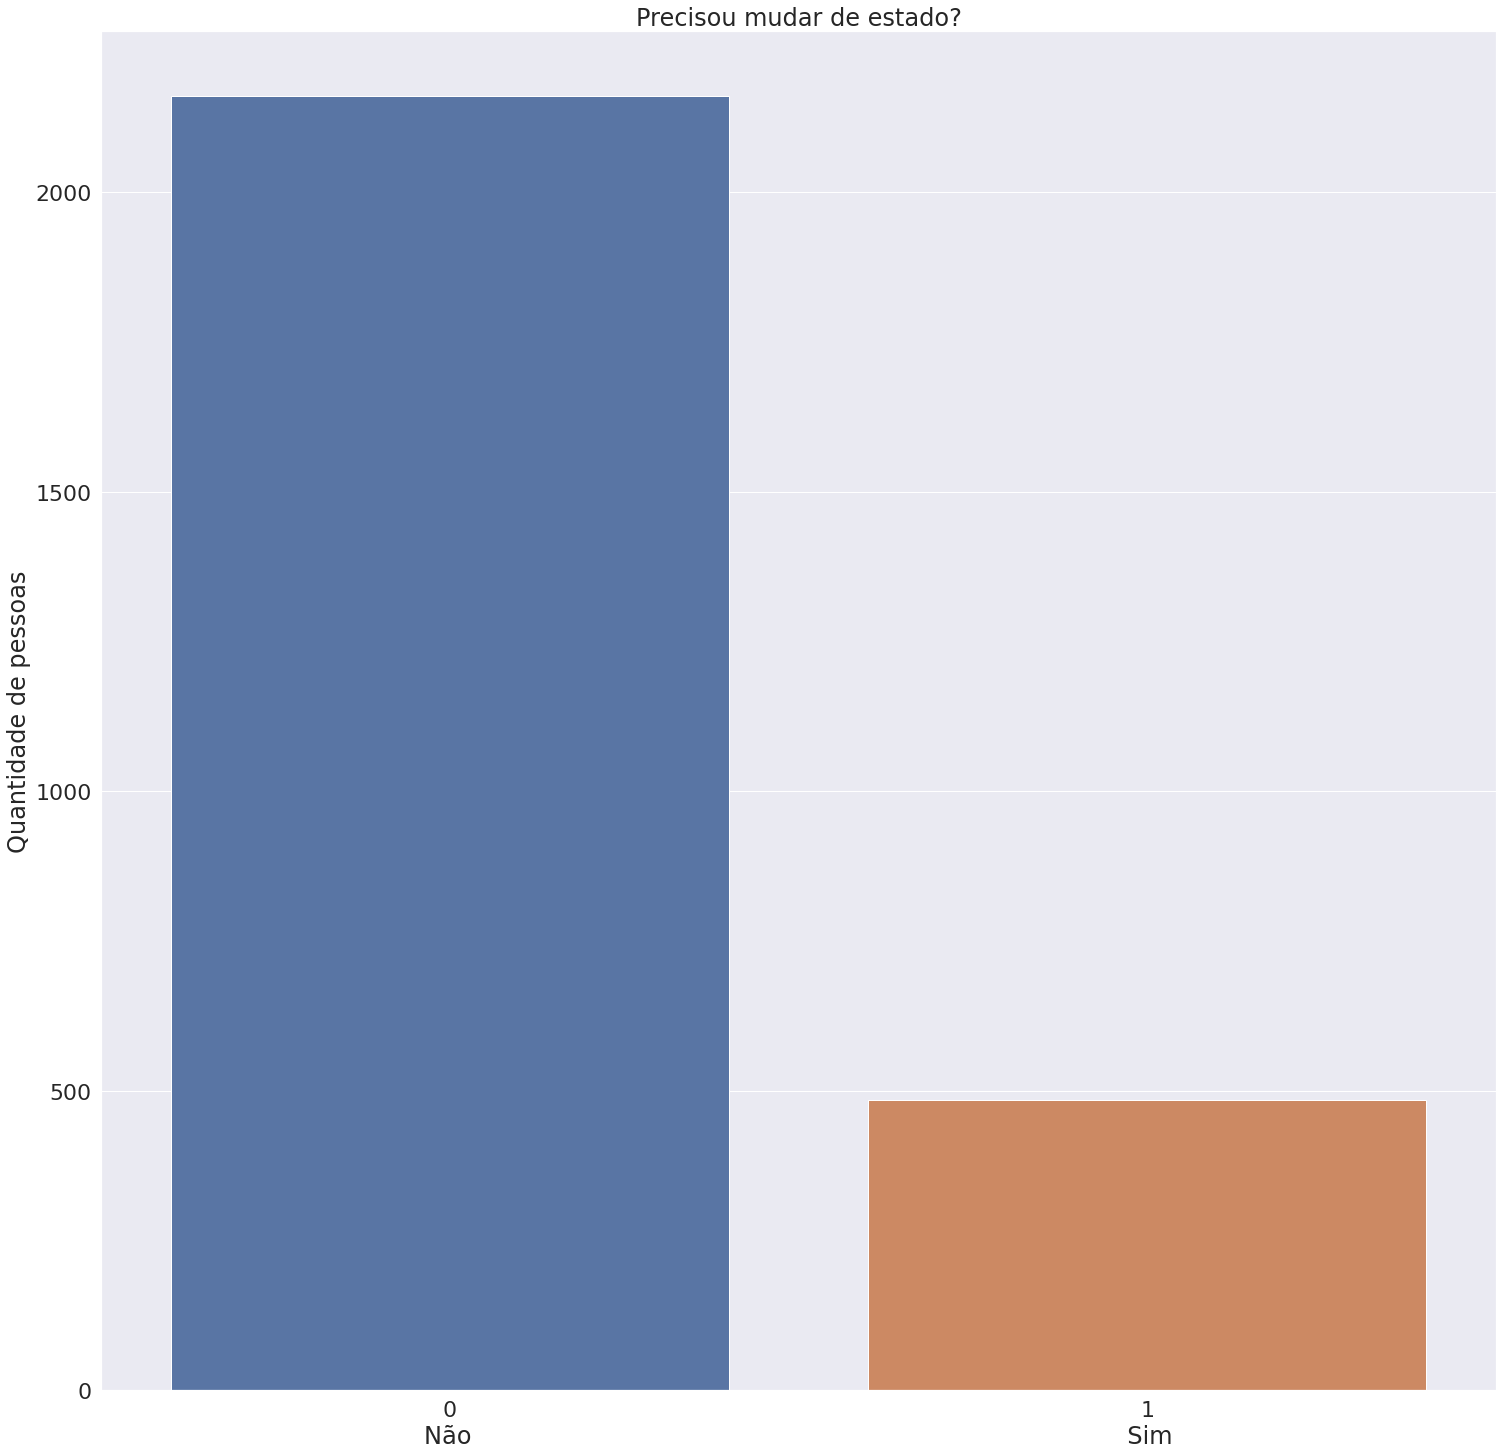

In [30]:
ax = sns.countplot(df_1["('P1_g_c ', 'Mudou de Estado?')"], order = df_1["('P1_g_c ', 'Mudou de Estado?')"].value_counts().index);
ax.set_title('Precisou mudar de estado?')
ax.figure.set_size_inches(25, 25)
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Não                                                                                      Sim');